# Determinantes del ingreso

Modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales.

### 1. Preliminares

A continuación se presentan las características del problema y el proceso de trabajo

#### 1.1 Problema

El problema corresponde a uno de classificación, ya que la variable objetivo "income" toma sólo dos valores posibles: <=50k o >50k, dependiendo si el individuo en cuestión percibe ingresos anuales superiores a dicha cantidad.

Dado ello, la variable objetivo es una variable categórica.

Enunciado: Modelo que define si un individuo presenta salarios mayores (>50K) o menores (<=50K) a 50.000 dólares anuales.

#### 1.2 Atributos disponibles

Para explicar el salario que presenta un individuo, existen los siguientes atributos disponibles:

* age: variable tipo entero que define la edad.
* workclass: variable categórica que define la naturaleza de la organización bajo la cual esta empleado.
* education: variable categórica que define el nivel educacional (bachillerato, masters, doctorado, etc).
* capital-gains: variable tipo entero que registra los ingresos generados fuera del trabajo.
* capital-losses: variable tipo entero que registra pérdidas de inversiones fuera del trabajo.
* fnlwgt: variable tipo entero que es un ponderador muestral.
* marital-status: variable categórica que define el estado civil.
* occupation: variable categórica que define la ocupación del individuo.
* relationship: categórica. Define la relación respecto a su familia.
* race: categórica. Especifica la raza.
* sex: categórica. Define el sexo.
* hours-per-week: entero. Detalla la cantidad de horas trabajadas por semana.
* native-country: categórica. Define el país de origen.

En cuanto a la variable objetivo:

* income: variable categórica que define como <=50K si el individuo percibe ingresos inferiores a 50.000 dólares anuales, o >50K si el individuo percibe ingresos superiores a 50.000 dólares anuales.

#### 1.3 Métricas para medir desempeño

Las métricas de precision y recall serán la base de nuestra medición de desempeño. Podemos describir cada una como:

* Precision: Fracción de etiquetas correctas entre las etiquetas positivas.

* Recall: Fracción de verdaderos positivos.

Ahora que las conocemos, detallamos la medida F1-score, la cual promedia ponderadamente las tendencias de precision y recall. Dado ello, nos permite obtener una visión global de cómo esta explicando nuestro modelo.

Además, usaremos la curva roc, la cual es una curva de probabilidad que muestra que tan bien nuestro modelo es capaz de diferenciar las clases estimadas comparando falsos positivos vs verdaderos positivos.

### 2. Aspectos computacionales

#### 2.1 Librerias a utilizar

Las librerias y versiones utilizadas son:

* numpy 
* pandas
* matplotlib
* seaborn
* warnings
* sklearn

Además, trabajaremos con la versión de Python 3.8.3.

In [2]:
#!python pip3 -m freeze

#### 2.2 Proceso tentativo recodificación de atributos

Se hará un análisis exploratorio tanto de la variable objetivo como de sus atributos donde:

* Se identificará la presencia de valores nulos, perdidos o caracteres incorrectos, y serán eliminados del modelo ya que nos generan problemas en la estimación. En esta etapa, se utilizará la función importada "calidad_datos" que nos permite tener una perspectiva global.

* Recodificación de clases: occupation, workclass, education, marital-status, native-country, e income; siguiendo las nomenclaturas especificadas.

* Exploración de correlaciones entre atributos y variable objetivo. La idea es identificar atributos que se correlacionan fuertemente y débilmente, para considerar excluirlas del modelo.

* Transformación de variables categóricas aplicando binary encoding. Se utiliza binary encoding por sobre one hot encoding ya que este último incorpora colinealidad al modelo. Se hará mediante pd.get_dummies(drop_first=True).

* La variable objetivo será transformada a valores binarios, tomando el valor 1 si el salario anual es mayor a 50 mil dólares, y 0 en cualquiera de los otros casos.

* Exploración de variables numéricas para identificar las escalas en las cuales se encuentran. Si se identifica la presencia de valores muy grandes en ciertos atributos, y valores muy pequeños en otros, se hará uso de StandardScaler() de la librería Sklearn para estandarizar los datos (restando la media y dividiendo por la desviación estándar).


#### 2.3 Importación de librerías

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.formula.api as smf

# machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, classification_report 

from calidad_datos import calidad_datos
from graficos import cross_plot

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 70
warnings.filterwarnings('ignore')

### 3. Descripción

In [4]:
# importación de datos limpios (notebook: income_cleaning.ipynb)
df = pd.read_csv('clean_income.csv')

#### 3.0 Calidad de los datos

In [5]:
calidad = calidad_datos(df)
calidad

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
age,int64,0,0.000000,0,0.000000,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90,20,-2,78,216
fnlwgt,int64,0,0.000000,0,0.000000,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06,120092,-62586.8,417779,1453
educational-num,int64,0,0.000000,0,0.000000,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16,3,4.5,16.5,1794
capital-gain,int64,0,0.000000,44807,0.917387,48842,NaN,NaN,NaN,1079.07,7452.02,0,0,0,0,99999,0,0,0,4035
capital-loss,int64,0,0.000000,46560,0.953278,48842,NaN,NaN,NaN,87.5023,403.005,0,0,0,0,4356,0,0,0,2282
hours-per-week,int64,0,0.000000,0,0.000000,48842,NaN,NaN,NaN,40.4224,12.3914,1,40,40,45,99,5,32.5,52.5,13496
income,int64,0,0.000000,37155,0.760718,48842,NaN,NaN,NaN,0.239282,0.426649,0,0,0,0,1,0,0,0,11687
workclass_recod,object,2799,0.057307,0,0.000000,46043,5,private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
educ_recod,object,0,0.000000,0,0.000000,48842,5,high-school,21353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
civstatus,object,0,0.000000,0,0.000000,48842,5,married,23044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


De acuerdo a la tabla anterior se identifica:

* Las variables workclass_recod y collars son las unicas que presentan valores nulos, pero son insignificantes ya que representan menos del 6%
* Las variables capital-gain y capital-loss presentan más de un 90% de valores iguales a cero, lo que podría significar que muchos individuos no han realizado inversiones
* La variable objetivo presenta un 76% de individuos con saldo menor a 50K. Esto nos dice, dado que tenemos dos categorias, que las clases están desbalanceadas

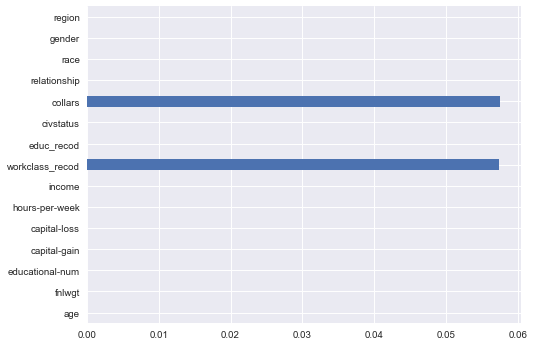

In [6]:
# grafica que visualiza el porcentaje de nulos
calidad['porc_nulos'].plot(kind='barh')

La prueba chi cuadrado trata de rechazar dos variables categóricas no tienen relacion. Visualiamos los resultados para nuestros atributos con pporcentaje de nulos:

In [7]:
var_obj = 'income'
for col in calidad.loc[calidad.porc_nulos>0].index:
    df_test = df.loc[:,[var_obj, col]].copy()
    df_test[f'null_{col}'] = np.where(df[col].isna(),1,0)
    df_test_group = df_test.groupby(f'null_{col}').agg({var_obj:['count','mean', 'std']})
    
    OD = pd.crosstab(df_test[var_obj], df_test[f'null_{col}'])
    chiRes = stats.chi2_contingency(OD)
    print(f'chi-square statistic: {np.round(chiRes[0],3)}')
    print(f'p-value: {np.round(chiRes[1],5)}')
    print(df_test_group)
    print('-'*80)

chi-square statistic: 340.246
p-value: 0.0
                     income                    
                      count      mean       std
null_workclass_recod                           
0                     46043  0.248072  0.431899
1                      2799  0.094677  0.292820
--------------------------------------------------------------------------------
chi-square statistic: 343.135
p-value: 0.0
             income                    
              count      mean       std
null_collars                           
0             46033  0.248126  0.431930
1              2809  0.094340  0.292353
--------------------------------------------------------------------------------


De lo anterior se infiere que la variable objetivo income y los atributos workclass_recod y collars, si estan relacionados.

#### 3.1 Inspección visual vector objetivo

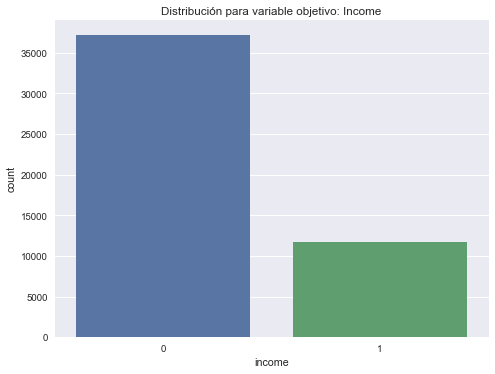

In [8]:
# balance de clases en la variable objetivo
sns.countplot(x=df['income'])
plt.title(f'Distribución para variable objetivo: Income')
plt.show()

In [9]:
print('Número de individuos con un salario menor o igual a 50K: {}'.format(round(df[df['income'] == '<=50K'].shape[0]/len(df), 2)))
print('Número de individuos con un salario mayor a 50K: {}'.format(round(df[df['income'] == '>50K'].shape[0]/len(df), 2)))

Número de individuos con un salario menor o igual a 50K: 0.0
Número de individuos con un salario mayor a 50K: 0.0


A partir del gráfico anterior, identificamos que las clases se encuentran desbalanceadas, pero la diferencia no constituye un inconveniente para ejectuar nuestro análisis estadístico.

----

A continuación, visualizaremos como interactúan los atributos categoricos con la variable objetivo. Se especifica la cantidad de observaciones por categoría, y la media de la variable objetivo en dicho grupo.

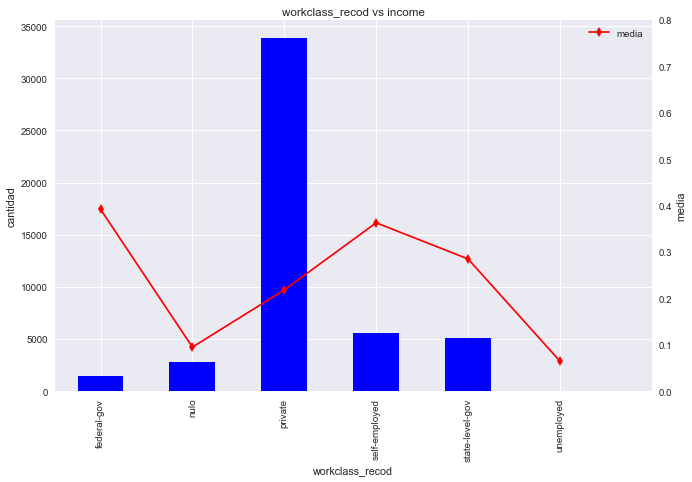

--------------------------------------------------------------------------------


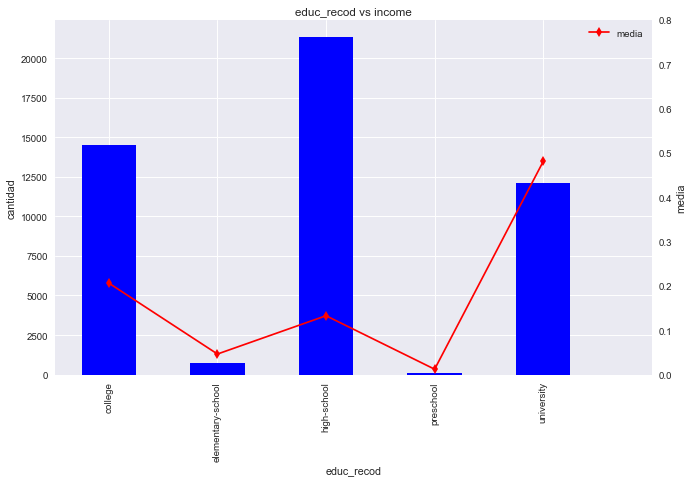

--------------------------------------------------------------------------------


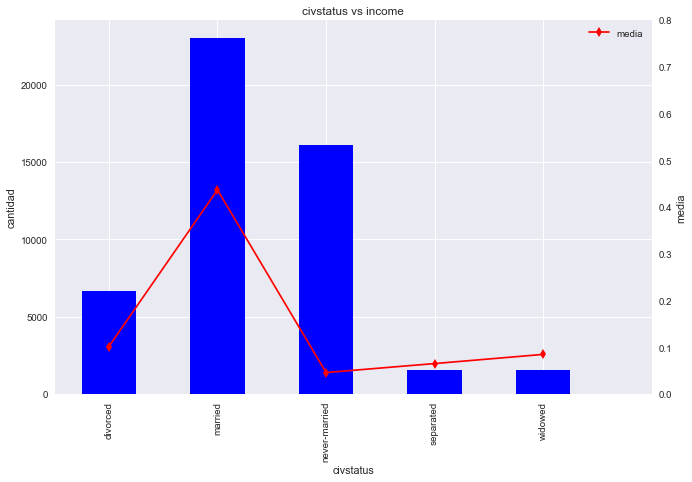

--------------------------------------------------------------------------------


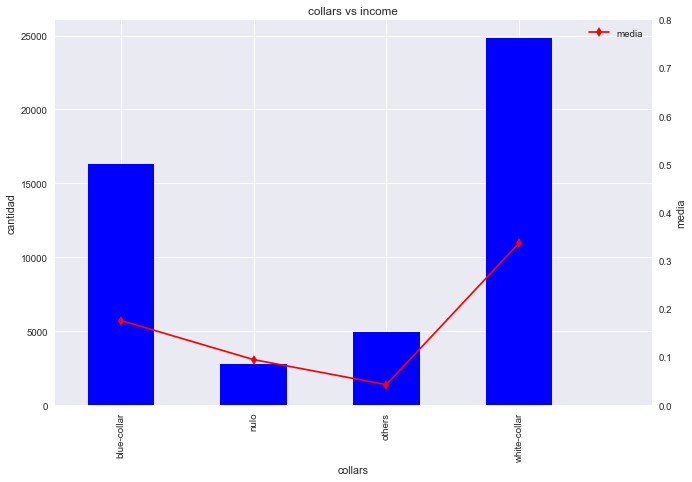

--------------------------------------------------------------------------------


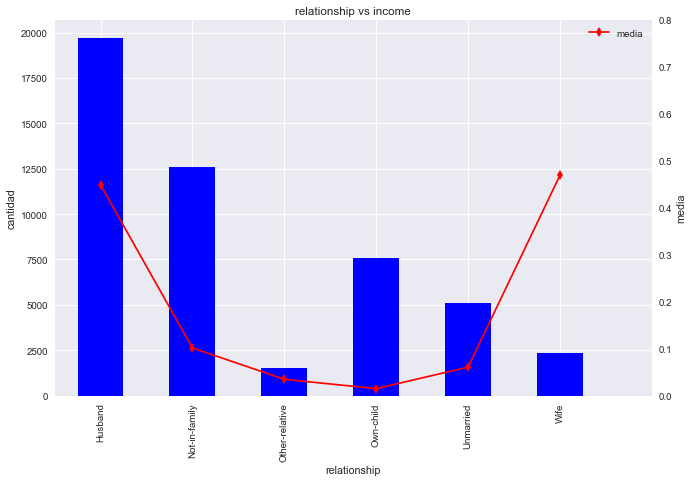

--------------------------------------------------------------------------------


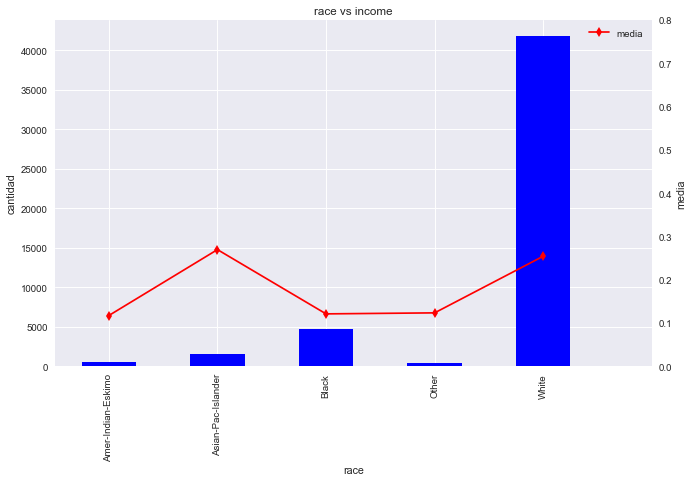

--------------------------------------------------------------------------------


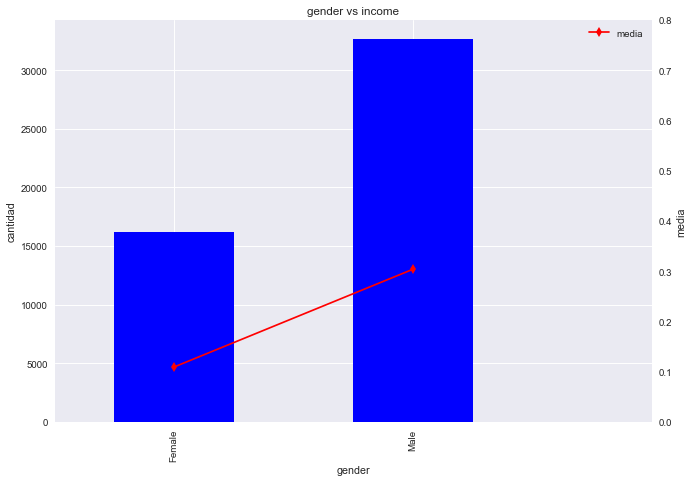

--------------------------------------------------------------------------------


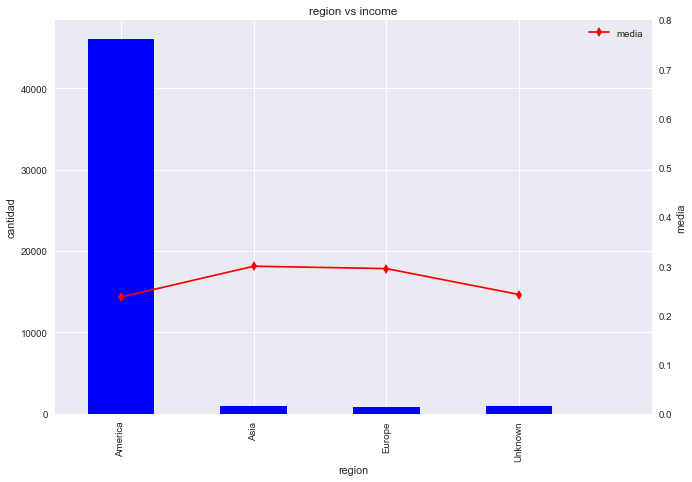

--------------------------------------------------------------------------------


In [10]:
var_obj = 'income'
for col in calidad.loc[calidad.tipo == 'object'].index:
    df_group = df.fillna('nulo').groupby(col).agg({var_obj: ['count', 'mean']})
    df_group.columns = ['cantidad', 'media']
    df_group = df_group.reset_index()
    titulo = f'{col} vs {var_obj}'
    cross_plot(df_group, 'cantidad', 'media', col, size=(10, 7),
                    xlim =(-0.5, df_group.shape[0]),
                    ylim=(0, 0.8), titulo=titulo, order=0, medias=0)
    print('-'*80)
    

A partir de las gráficas anteriores se identifica que:

* Existen categorías como "private" en el atributo "workclass_cod", "high-school" en "educ_recod", "America" en "region", o "never-married" en "civstatus"; que a pesar de concentrar gran cantidad de observaciones presentan una baja media de la V.O.
* Race es una clase bien balanceada, pero se esperaría una menor explicación por parte de "black" y "other".
* Married en civstatus podría ser un buen predictor individual de los salarios, ya que presenta altas observaciones y una media considerable, aunque esto podría cuestionarse como un sesgo de los datos hacia individuos casados.
* workclass_recod es un atributo donde las clases con menor observaciones presentan mayor media.
* Hombres poseen una media de observaciones mayores a 50K más alta que las mujeres.

#### 3.2 Visualizaciónes entre atributos y/o variable objetivo

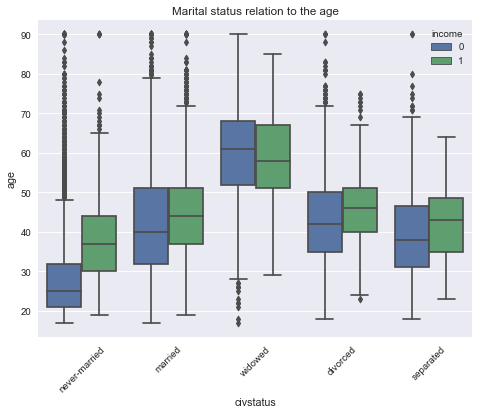

In [11]:
# relacion entre estado civil y edad
sns.boxplot(x='civstatus', y='age', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Marital status relation to the age')
plt.show()

El gráfico muestra resultados esperables de acuerdo a la sociedad. Por lo general personas viudas tienden a tener mayor edad, solteros son considerados los más jovenes, separados después de unos años de matrimonio, y divorciados ya a edades mayores también.

Además, independiente del estado civil, los salarios mayores a 50k tienden a relacionarse con una mayor edad.

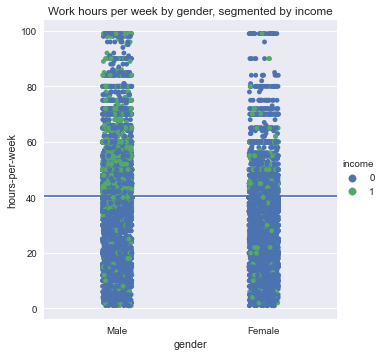

In [12]:
# distribución de hombres y mujeres por país

sns.catplot(x='gender', y='hours-per-week', hue='income', data=df)
plt.axhline(df['hours-per-week'].mean())
plt.title('Work hours per week by gender, segmented by income')
plt.show()

En el gráfico identificamos que los hombres tienden a trabajar un mayor número de horas a la semana en comparación a las mujeres. Además, la tendencia a tener salarios anuales mayores a 50k se relaciona mucho con trabajar un mayor número de horas semanales que la media (~40 hrs). Por último, los salarios mayores a 50k están concontrados principalmente en hombres que trabajan una cantidad mayor o igual a 40 hrs semanales.

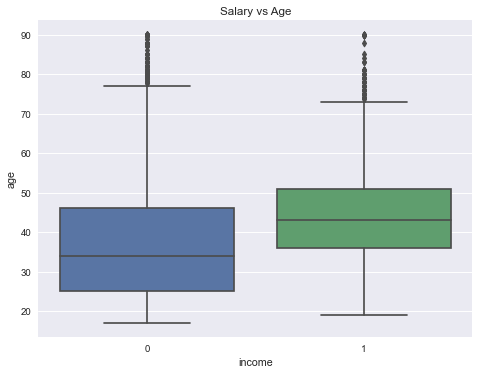

In [13]:
# relacion del salario anual vs edad
sns.boxplot(x='income', y='age', data=df)
plt.title('Salary vs Age')
plt.show()

Este gráfico confirma la presencia de salarios mayores a una mayor edad. Podemos partir por mirar una mayor mediana.

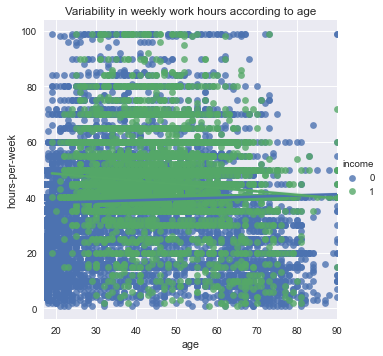

In [14]:
sns.lmplot(x='age', y='hours-per-week', hue='income', data=df)
plt.title('Variability in weekly work hours according to age')
plt.show()

Este gráfico nos presenta una recta con pendiente positiva (leve) para describir la interacción entre la edad y las horas trabajadas, donde mayores salarios se ven principalmente en mayores horas semanales de trabajo entre los 30 y 60 años.

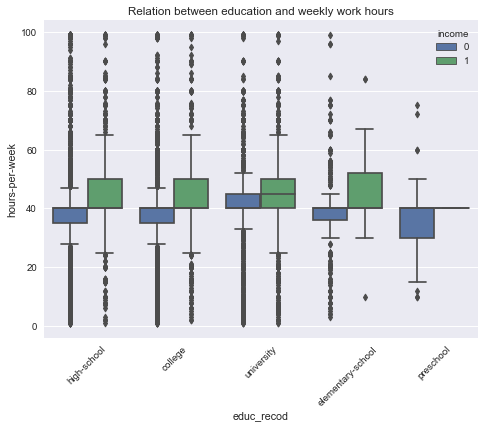

In [15]:
sns.boxplot(x='educ_recod', y='hours-per-week', hue='income', data=df)
plt.title('Relation between education and weekly work hours')
plt.xticks(rotation=45)
plt.show()

En la gráfica anterior identificamos que el nivel educacional no presenta grandes diferencias aparentes en cuanto a las horas trabajadas, aunque si es de notar que independiente de la educación, los hombres tienden a trabajar un numero mayor de horas a la semana.

#### Análisis de correlaciones

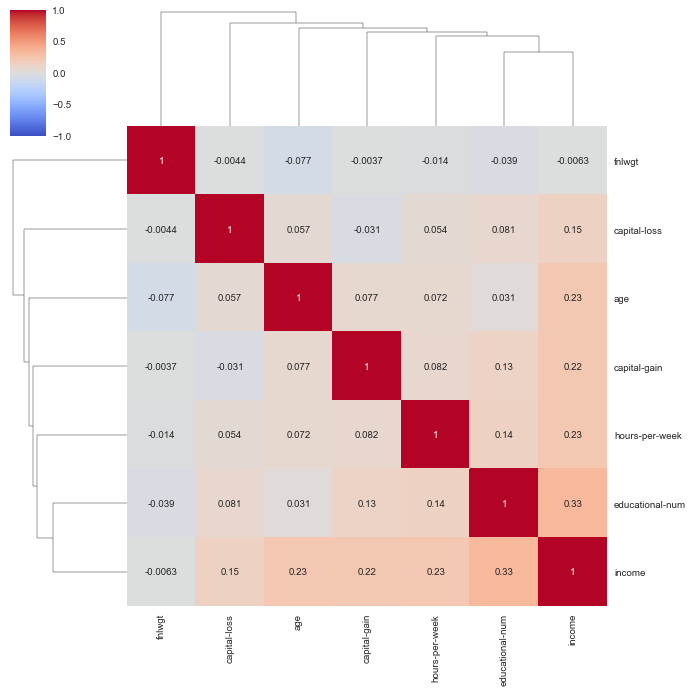

In [16]:
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

PROFUNDIZAR !

In [27]:
df_cat = df.loc[:, ['workclass_recod', 'educ_recod', 'civstatus', 'collars', 'relationship', 'race', 'gender', 'region']]

In [ ]:
#OD = pd.crosstab(df_cat[var_obj], df_cat[f'null_{col}'])
chiRes = stats.chi2_contingency(df_cat)
print(f'chi-square statistic: {np.round(chiRes[0],3)}')
print(f'p-value: {np.round(chiRes[1],5)}')
print(df_test_group)
print('-'*80)

In [26]:
df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,private,226802,high-school,7,never-married,blue-collar,Own-child,Black,Male,0,0,40,America,0
1,38,private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,1
3,44,private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,1
4,18,NaN,103497,college,10,never-married,NaN,Own-child,White,Female,0,0,30,America,0


In [17]:
df.columns

Index(['age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
       'civstatus', 'collars', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'region', 'income'],
      dtype='object')

### 4. Modelación descriptiva

Primero que todo, transformamos variables categoricas utilizando Binary Encoding.

In [18]:
df_dummies = pd.get_dummies(df.dropna(), drop_first=True)
df_dummies.columns = [col.replace('-', '_') for col in df_dummies.columns]

In [34]:
df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,private,226802,high-school,7,never-married,blue-collar,Own-child,Black,Male,0,0,40,America,0
1,38,private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,1
3,44,private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,1
4,18,NaN,103497,college,10,never-married,NaN,Own-child,White,Female,0,0,30,America,0


In [29]:
df_dummies

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income,workclass_recod_private,workclass_recod_self_employed,workclass_recod_state_level_gov,...,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,gender_Male,region_Asia,region_Europe,region_Unknown
0,25,226802,7,0,0,40,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
5,34,198693,6,0,0,30,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
48838,40,154374,9,0,0,40,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
48839,58,151910,9,0,0,40,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
48840,22,201490,9,0,0,20,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


Segundo, estimamos descriptivamente el ingreso (V.O) haciendo uso de logit:

In [19]:
def logit_formula(df, var_obj):
    """Genera la fórmula del modelo logit con todos sus atributos y variable objetivo.

    Args:
        df (dataframe): Conjunto de datos
        var_obj (string): variable objetivo

    Returns:
        string: formula total
    """
    base_formula = f'{var_obj} ~ '
    for col in df.columns:
        if col != var_obj:
            base_formula += f'{col} + '
    return base_formula[:-3]

In [20]:
base_formula = logit_formula(df_dummies, var_obj='income')

In [21]:
model_logit = smf.logit(base_formula, data=df_dummies).fit()
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.332089
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                46033
Model:                          Logit   Df Residuals:                    45999
Method:                           MLE   Df Model:                           33
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.4073
Time:                        22:52:51   Log-Likelihood:                -15287.
converged:                       True   LL-Null:                       -25791.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.6740      0.309    -24.805      0.000      -8.280      -7.068
age                                 0.0254      0.001     18.931      0.000       0.023       0.028
fnlwgt                            7.33e-07   1.39e-07      5.280      0.000    4.61e-07    1.01e-06
educational_num                     0.2715      0.016     17.171      0.000       0.241       0.302
capital_gain                        0.0003   8.56e-06     37.179      0.000       0.000       0.000
capital_loss                        0.0007   3.05e-05     21.720      0.000       0.001       0.001
hours_per_week                      0.0296      0.001     22.654      0.000       0.027       0.032
workclass_recod_private            -0.4532      0.074     -6.102      0.000      -0.599      -0.308
workclass_recod_self_employed      -0.7927      0.081     -9.753      0.000      -0.952      -0.633
workclass_recod_state_level_gov    -0.5268      0.083     -6.349      0.000      -0.689      -0.364
workclass_recod_unemployed         -1.5592      0.803     -1.942      0.052      -3.133       0.014
educ_recod_elementary_school        0.1688      0.229      0.738      0.461      -0.280       0.617
educ_recod_high_school             -0.0776      0.046     -1.674      0.094      -0.168       0.013
educ_recod_preschool               -4.0234      4.039     -0.996      0.319     -11.939       3.892
educ_recod_university               0.0907      0.060      1.509      0.131      -0.027       0.209
civstatus_married                   0.7768      0.136      5.715      0.000       0.510       1.043
civstatus_never_married            -0.4767      0.071     -6.669      0.000      -0.617      -0.337
civstatus_separated                -0.0533      0.133     -0.401      0.688      -0.313       0.207
civstatus_widowed                   0.0791      0.127      0.621      0.535      -0.170       0.329
collars_others                     -0.7209      0.085     -8.452      0.000      -0.888      -0.554
collars_white_collar                0.6021      0.035     17.176      0.000       0.533       0.671
relationship_Not_in_family         -0.9811      0.131     -7.477      0.000      -1.238      -0.724
relationship_Other_relative        -1.4663      0.184     -7.957      0.000      -1.828      -1.105
relationship_Own_child             -1.9446      0.163    -11.900      0.000      -2.265      -1.624
relationship_Unmarried             -1.2129      0.148     -8.196      0.000      -1.503      -0.923
relationship_Wife                   1.0555      0.083     12.679      0.000       0.892       1.219
race_Asian_Pac_Islander             0.6153      0.214      2.872      0.004       0.195       1.035
race_Black                          0.2602      0.189      1.379      0.168      -0.110       0.630
race_Other                          0.1926      0.268      0.719      0.472      -0.333       0.718
race_White                          0.513

#### Resultados estadísticos

Como resultado del modelo anterior, identificamos que el pseudo r2 es de 0.4073. Esto significa que nuestros atributos actuales explican ~40% del ingreso.

Además, identificamos que el log-likelihood ratio demuestra que nuestro modelo es significativo ya que nos hace rechazar la hipótesis nula que no existen variables significativas, y complementa con los resultados de máxima verosimilitud.

Por otro lado, se especifican los intervalos de confianza. Estos nos permiten identificar, al contener el cero entre ellos, que las siguientes variables no son significativas: workclass_recod_unemployed, educ_record (todas sus clases), civstatus_separated, civstatus_widowed, race_Black, race_Other, region_Asia, y region_Europe. 

De acuerdo a los resultados anteriores, eliminamos las variables no significativas de nuestro modelo y volvemos a predecir:

In [35]:
not_sig = ['workclass_recod_unemployed', 'educ_recod_elementary_school', 'educ_recod_high_school', 'educ_recod_preschool', 'educ_recod_university', 'civstatus_separated', 'civstatus_widowed', 'race_Black', 'race_Other', 'region_Asia', 'region_Europe']
df_sig = df_dummies.drop(not_sig, axis=1)

In [39]:
base_formula_1 = logit_formula(df_sig, var_obj='income')

In [40]:
model_logit_1 = smf.logit(base_formula_1, data=df_sig).fit()
model_logit_1.summary()

Optimization terminated successfully.
         Current function value: 0.332362
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                46033
Model:                          Logit   Df Residuals:                    46010
Method:                           MLE   Df Model:                           22
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.4068
Time:                        00:13:50   Log-Likelihood:                -15300.
converged:                       True   LL-Null:                       -25791.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.7315      0.209    -37.042      0.000      -8.141      -7.322
age                                 0.0256      0.001     19.346      0.000       0.023       0.028
fnlwgt                           7.485e-07   1.38e-07      5.422      0.000    4.78e-07    1.02e-06
educational_num                     0.2958      0.007     41.308      0.000       0.282       0.310
capital_gain                        0.0003   8.55e-06     37.199      0.000       0.000       0.000
capital_loss                        0.0007   3.05e-05     21.729      0.000       0.001       0.001
hours_per_week                      0.0296      0.001     22.653      0.000       0.027       0.032
workclass_recod_private            -0.4338      0.074     -5.889      0.000      -0.578      -0.289
workclass_recod_self_employed      -0.7735      0.081     -9.585      0.000      -0.932      -0.615
workclass_recod_state_level_gov    -0.5064      0.082     -6.146      0.000      -0.668      -0.345
civstatus_married                   0.7720      0.133      5.785      0.000       0.510       1.034
civstatus_never_married            -0.4707      0.068     -6.956      0.000      -0.603      -0.338
collars_others                     -0.7174      0.085     -8.417      0.000      -0.885      -0.550
collars_white_collar                0.6126      0.035     17.635      0.000       0.545       0.681
relationship_Not_in_family         -0.9835      0.131     -7.510      0.000      -1.240      -0.727
relationship_Other_relative        -1.4742      0.184     -7.998      0.000      -1.835      -1.113
relationship_Own_child             -1.9490      0.163    -11.951      0.000      -2.269      -1.629
relationship_Unmarried             -1.2166      0.148     -8.237      0.000      -1.506      -0.927
relationship_Wife                   1.0453      0.083     12.608      0.000       0.883       1.208
race_Asian_Pac_Islander             0.2308      0.099      2.328      0.020       0.036       0.425
race_White                          0.2885      0.057      5.086      0.000       0.177       0.400
gender_Male                         0.7782      0.063     12.323      0.000       0.654       0.902
region_Unknown                     -0.2800      0.107     -2.619      0.009      -0.490      -0.070
===================================================================================================
"""

Comparando los resultados con el primer modelo identificamos que las variables mantienen su significancia, aunque el pseudo r2 disminuye levemente. A pesar de ello, el log likelihood ratio p-value nos mantiene el rechazo hacia la hipótesis nula.

#### Próxima etapa

Posterior al proceso de modelación descriptiva, comenzamos con la predicción mediante regresión logística. Para ello, utilizaremos la librería scikit-learn, dados los modulos de gran desarrollo que presenta.

Primero generaremos conjuntos de entrenamiento y validación, para despúes estandarizar los datos ya que existen variables como "fnlwgt" que presentan valores que podrían sesgar a nuestro modelo. Luego, ajustaremos los datos, realizaremos predicciones, y compararemos con nuevos modelos generados a partir de los resultados que se vayan obteniendo.

Observación: se utilizará el dataframe con las variables significativas obtenidas por logit.

### 5. Modelación predictiva

In [42]:
# separando matriz de atributos de vector objetivo
mat_atr = df_sig.drop('income', axis=1)
vec_obj = df_sig['income']

In [45]:
# split de conjuntos de entrenamiento vs prueba
X_train, X_test, y_train, y_test = train_test_split(mat_atr, vec_obj, test_size=.33, random_state=1238)

In [46]:
# estandarizamos conjunto de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [47]:
# ajustamos modelo sin alterar hiperparámetros
modelo_1 =  LogisticRegression().fit(X_train_std, y_train)

In [48]:
# prediccion de clases y probabilidad
y_hat = modelo_1.predict(X_test_std)

In [50]:
#  métricas de ajuste
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11487
           1       0.71      0.59      0.64      3704

    accuracy                           0.84     15191
   macro avg       0.79      0.76      0.77     15191
weighted avg       0.83      0.84      0.84     15191



In [51]:
# curva roc
false_positive, true_positive, threshold = roc_curve(y_test, y_hat)

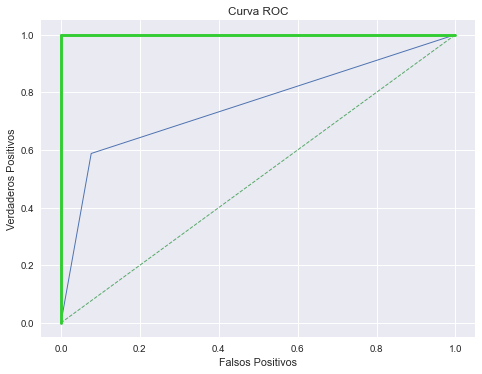

In [52]:
# grafico roc
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1], c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');